In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Original height and width = 564 715


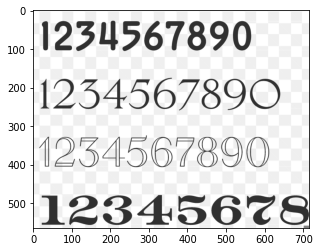

In [23]:
image = cv2.imread('19s.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h,w,c=image.shape
print(f'Original height and width = {h} {w}')

#resizing the image to make width 1000 and keeping aspect ratio same 
aspectRatio = w/h
if(w>1000):
    w = 1000
    h = int(w/aspectRatio)
    print(f'new height and width = {h} {w}')
    image = cv2.resize(image,(w,h),interpolation=cv2.INTER_AREA)


plt.imshow(image)
    

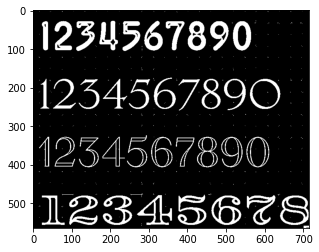

In [24]:
def thresholding(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,8)
    plt.imshow(thresh,cmap='gray')
    return thresh

thresholdImage = thresholding(image)

Dilation

Line Segmentation

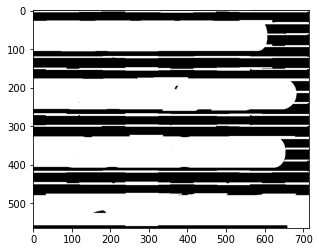

In [25]:
kernel = np.ones((3,85),np.uint8)
# print(kernel)
dilatedImage = cv2.dilate(thresholdImage,kernel=kernel,iterations=1)
plt.imshow(dilatedImage,cmap='gray')

In [26]:
(contours,heirarchy) = cv2.findContours(dilatedImage.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contour_lines = sorted(contours,key=lambda ctr : cv2.boundingRect(ctr)[1])#x,y,,w,h

11


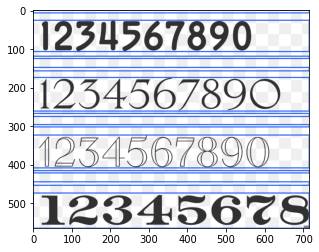

In [27]:
tempImage = image.copy()
count =0 
for ctr in sorted_contour_lines :
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(tempImage, (x,y), (x+w,y+h),(40,100,250),2)
    count = count + 1

plt.imshow(tempImage)
print(count)


Word Segmentation

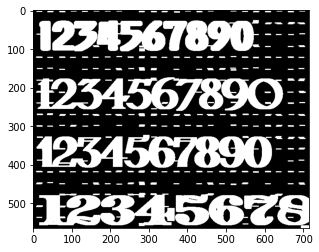

In [28]:
#dialation
kernel = np.ones((3,15),np.uint8)
dilatedImage2 = cv2.dilate(thresholdImage,kernel=kernel,iterations=1)
plt.imshow(dilatedImage2,cmap='gray')


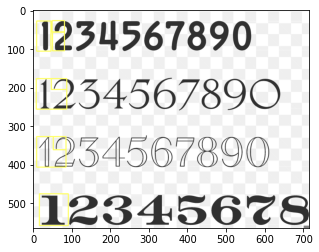

In [29]:
tempImage2 = image.copy()
wordList = []

for line in sorted_contour_lines:
    #roi of each line .selecting  first line words from dilatedImage2
    x,y,w,h = cv2.boundingRect(line)
    roi_line = dilatedImage2[y:y+h,x:x+h]
    #drawing contours on each word
    (cnt,heirarchy) = cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt,key=lambda cntr : cv2.boundingRect(cntr)[0])#x,y,,w,h

    for word in sorted_contour_words:
        if(cv2.contourArea(word)<400):
            continue
        x2,y2,w2,h2 = cv2.boundingRect(word)
        wordList.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
        cv2.rectangle(tempImage2,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,255,100),2)

plt.imshow(tempImage2)

[9, 28, 46, 106]
[49, 27, 81, 57]
[50, 56, 81, 105]
[8, 177, 87, 256]
[47, 177, 87, 205]
[9, 327, 85, 406]
[52, 327, 85, 361]
[16, 475, 91, 557]


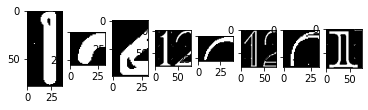

In [30]:
for (index,word) in enumerate(wordList,start=0):
    print(word)
    # wordImage = image[word[1]:word[3],word[0]:word[2]]
    # plt.subplot(1,len(wordList),index+1)
    # plt.imshow(image[word[1]:word[3],word[0]:word[2]])
    # plt.imshow(ret)
    crop_img = image[word[1]:word[3],word[0]:word[2]]
    crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    # cv2.imwrite(f'file{index}.jpg',crop_img)
    ret = cv2.adaptiveThreshold(crop_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,8)
    plt.subplot(1,len(wordList),index+1)
    plt.imshow(ret,cmap='gray')

